In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
#decision tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#knn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#svm
from sklearn.svm import SVC, SVR
#naive bayes

#logistic regression
from sklearn.linear_model import LogisticRegression
#neural network
from sklearn.neural_network import MLPClassifier, MLPRegressor
#xgboost
from sklearn.preprocessing import StandardScaler

#json
import json

#linear regression
from sklearn.linear_model import LinearRegression

# classification_report
from sklearn.metrics import classification_report, confusion_matrix

# dummy classifier
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


# Regression

## RF without normalization

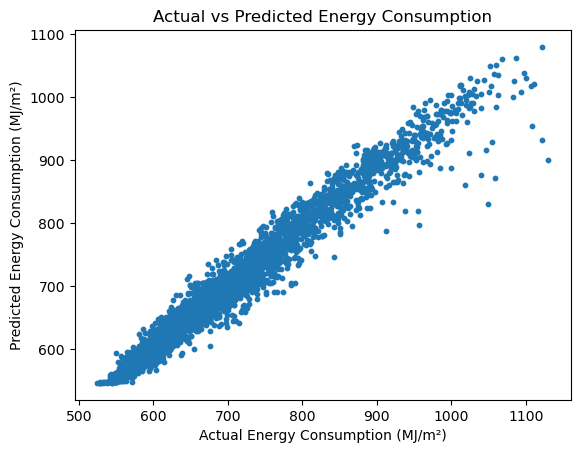

MSE:  466.02076717129677
RMSE:  21.587514149880636
NMSE:  0.04042303961588437


In [26]:
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
regressor.fit(train_set[input_cols], train_set[output_col])

#predict
predictions = regressor.predict(test_set[input_cols])

# Plot scatter graph with smaller points
plt.scatter(test_set[output_col], predictions, s=10)
plt.xlabel('Actual Energy Consumption (MJ/m²)')
plt.ylabel('Predicted Energy Consumption (MJ/m²)')
plt.title('Actual vs Predicted Energy Consumption - RF')
plt.show()

#calculate error
error = np.mean((predictions - test_set[output_col])**2)
print('MSE: ', error)
print('RMSE: ', np.sqrt(error))
naive_pred = np.mean(train_set[output_col])
naive_error = np.mean((naive_pred - test_set[output_col])**2)

nmse = error / naive_error

print('NMSE: ', nmse)



## RF with normalization

/tmp/ipykernel_497330/4158794212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[input_cols] = scaler.transform(train_set[input_cols])
/tmp/ipykernel_497330/4158794212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set[input_cols] = scaler.transform(test_set[input_cols])


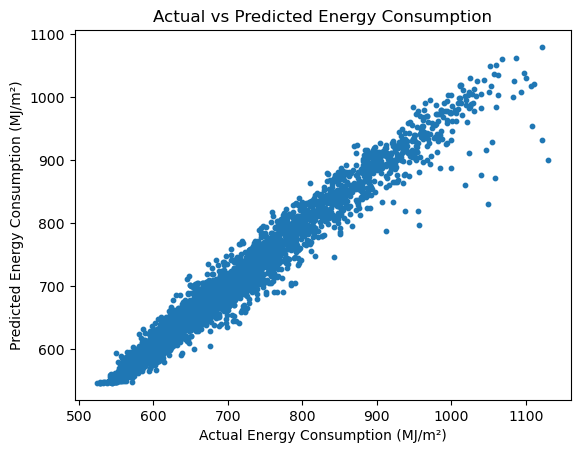

MSE:  465.95634644423467
RMSE:  21.586022015281895
NMSE:  0.04041745170696366


In [27]:
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

scaler = StandardScaler()
scaler.fit(train_set[input_cols])

train_set[input_cols] = scaler.transform(train_set[input_cols])
test_set[input_cols] = scaler.transform(test_set[input_cols])

regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
regressor.fit(train_set[input_cols], train_set[output_col])

#predict
predictions = regressor.predict(test_set[input_cols])

# Plot scatter graph with smaller points
plt.scatter(test_set[output_col], predictions, s=10)
plt.xlabel('Actual Energy Consumption (MJ/m²)')
plt.ylabel('Predicted Energy Consumption (MJ/m²)')
plt.title('Actual vs Predicted Energy Consumption - RF after normalization')
plt.show()

#calculate error
error = np.mean((predictions - test_set[output_col])**2)
print('MSE: ', error)
print('RMSE: ', np.sqrt(error))
      
naive_pred = np.mean(train_set[output_col])
naive_error = np.mean((naive_pred - test_set[output_col])**2)

nmse = error / naive_error

print('NMSE: ', nmse)


## Linear regression

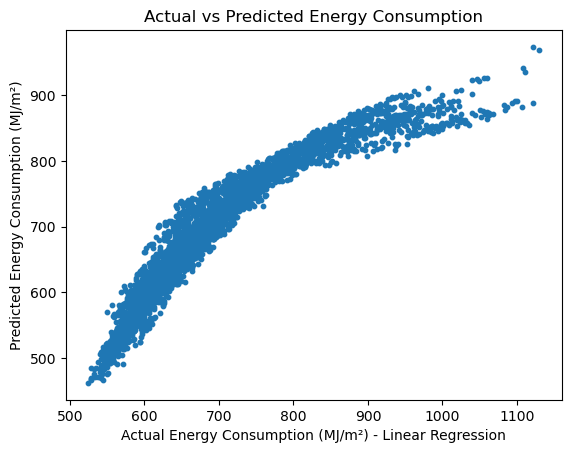

MSE:  1522.6389535310566
RMSE:  39.02100656737415
NMSE:  0.13207500410952847


In [32]:
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

scaler = StandardScaler()
scaler.fit(train_set[input_cols])

train_set[input_cols] = scaler.transform(train_set[input_cols])
test_set[input_cols] = scaler.transform(test_set[input_cols])

regressor = LinearRegression()
regressor.fit(train_set[input_cols], train_set[output_col])

#predict
predictions = regressor.predict(test_set[input_cols])

# Plot scatter graph with smaller points
plt.scatter(test_set[output_col], predictions, s=10)
plt.xlabel('Actual Energy Consumption (MJ/m²)')
plt.ylabel('Predicted Energy Consumption (MJ/m²)')
plt.title('Actual vs Predicted Energy Consumption - Linear Regression')
plt.show()

#calculate error
error = np.mean((predictions - test_set[output_col])**2)
print('MSE: ', error)
print('RMSE: ', np.sqrt(error))
      
naive_pred = np.mean(train_set[output_col])
naive_error = np.mean((naive_pred - test_set[output_col])**2)

nmse = error / naive_error

print('NMSE: ', nmse)



/tmp/ipykernel_497330/2799305499.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[input_cols] = scaler.fit_transform(train_set[input_cols])
/tmp/ipykernel_497330/2799305499.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set[input_cols] = scaler.transform(test_set[input_cols])


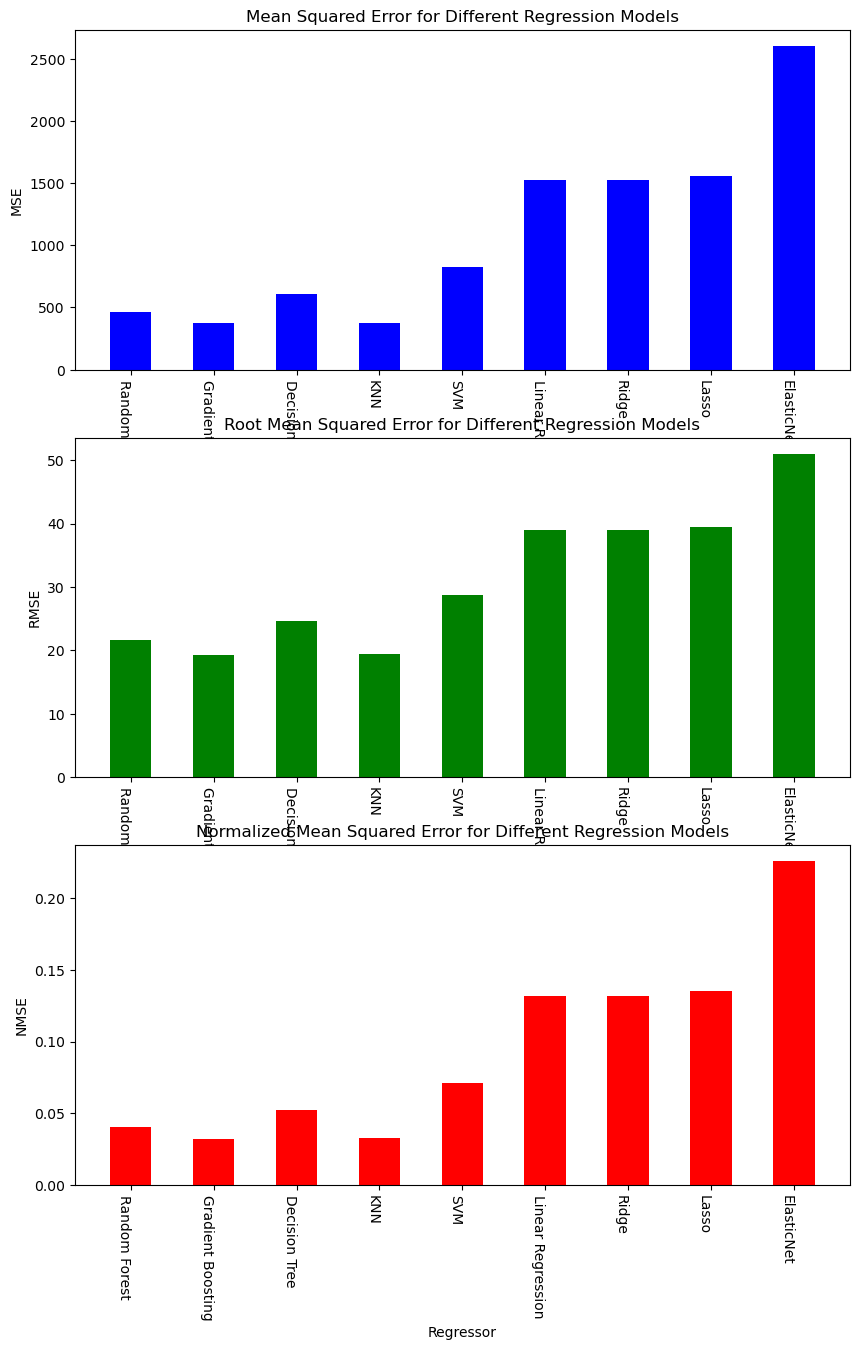

In [72]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

# Scale the input data
scaler = StandardScaler()
train_set[input_cols] = scaler.fit_transform(train_set[input_cols])
test_set[input_cols] = scaler.transform(test_set[input_cols])

# Define the list of regressors to test
regressors = [    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0),    GradientBoostingRegressor(),    DecisionTreeRegressor(),    KNeighborsRegressor(),    SVR(),    LinearRegression(),    Ridge(),    Lasso(),    ElasticNet()]

# Initialize lists to store scores
mse_scores = []
rmse_scores = []
nmse_scores = []

# Loop over regressors
for regressor in regressors:
    # Train the regressor
    regressor.fit(train_set[input_cols], train_set[output_col])

    # Make predictions
    predictions = regressor.predict(test_set[input_cols])

    # Calculate MSE, RMSE, and NMSE
    mse = mean_squared_error(test_set[output_col], predictions)
    rmse = np.sqrt(mse)
    naive_pred = np.mean(train_set[output_col])
    naive_mse = np.mean((naive_pred - test_set[output_col])**2)
    nmse = mse / naive_mse

    # Add scores to lists
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    nmse_scores.append(nmse)

# Plot bar charts of scores
fig, axs = plt.subplots(nrows=3, figsize=(10, 15))

x_labels = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'KNN', 'SVM', 'Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']
x_pos = np.arange(len(x_labels))
bar_width = 0.5

axs[0].bar(x_pos, mse_scores, bar_width, color='blue')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(x_labels, rotation=-90, ha='right')
axs[0].set_xlabel('Regressor')
axs[0].set_ylabel('MSE')
axs[0].set_title('Mean Squared Error for Different Regression Models')

axs[1].bar(x_pos, rmse_scores, bar_width, color='green')
axs[1].set_xticks(x_pos)
axs[1].set_xticklabels(x_labels, rotation=-90, ha='right')
axs[1].set_xlabel('Regressor')
axs[1].set_ylabel('RMSE')
axs[1].set_title('Root Mean Squared Error for Different Regression Models')

axs[2].bar(x_pos, nmse_scores, bar_width, color='red')
axs[2].set_xticks(x_pos)
axs[2].set_xticklabels(x_labels, rotation=-90, ha='right')
axs[2].set_xlabel('Regressor')
axs[2].set_ylabel('NMSE')
axs[2].set_title('Normalized Mean Squared Error for Different Regression Models')

plt.show()



# Classification

In [118]:
with open('./quantiles_dict.json', 'r') as qd:
    quantiles_dict = json.load(qd)

def energy_to_class(energy_consumption, energy_quantiles):
    return next((i for i, q in enumerate(energy_quantiles) if energy_consumption <= q), len(energy_quantiles))

In [136]:
# Load the data
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'

# Replace target label with class
data[output_col] = data[output_col].apply(lambda x: energy_to_class(x, quantiles_dict['energy']))

# Split the data into training and testing sets
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

# Define the list of classifiers to test
classifiers = [
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression(),
    MLPClassifier(),
]

# Loop over classifiers
confusion_matrices = []
accuracies = []
for classifier in classifiers:
    # Train the classifier
    scaler = StandardScaler()
    train_set_scaled = scaler.fit_transform(train_set[input_cols])
    test_set_scaled = scaler.transform(test_set[input_cols])
    classifier.fit(train_set_scaled, train_set[output_col])

    # Make predictions
    predictions = classifier.predict(test_set_scaled)

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(test_set[output_col], predictions)
    cm = confusion_matrix(test_set[output_col], predictions)

    # Add accuracy and confusion matrix to lists
    accuracies.append(accuracy)
    confusion_matrices.append(cm)



/home/gianmarco/.conda/envs/dtr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gianmarco/.conda/envs/dtr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [137]:
########################
########ADDING DGL###### 
########################
# TODO: proper comparison 

# load dgl_actual.pkl 
with open('./dgl_actual.pkl', 'rb') as f:
    dgl_actual = pickle.load(f)

# load dgl_predicted.pkl
with open('./dgl_predicted.pkl', 'rb') as f:
    dgl_predicted = pickle.load(f)

class DGLClassifier:
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

accuracy = accuracy_score(dgl_actual, dgl_predicted)
cm = confusion_matrix(dgl_actual, dgl_predicted)

classifiers.append(DGLClassifier())
accuracies.append(accuracy)
confusion_matrices.append(cm)

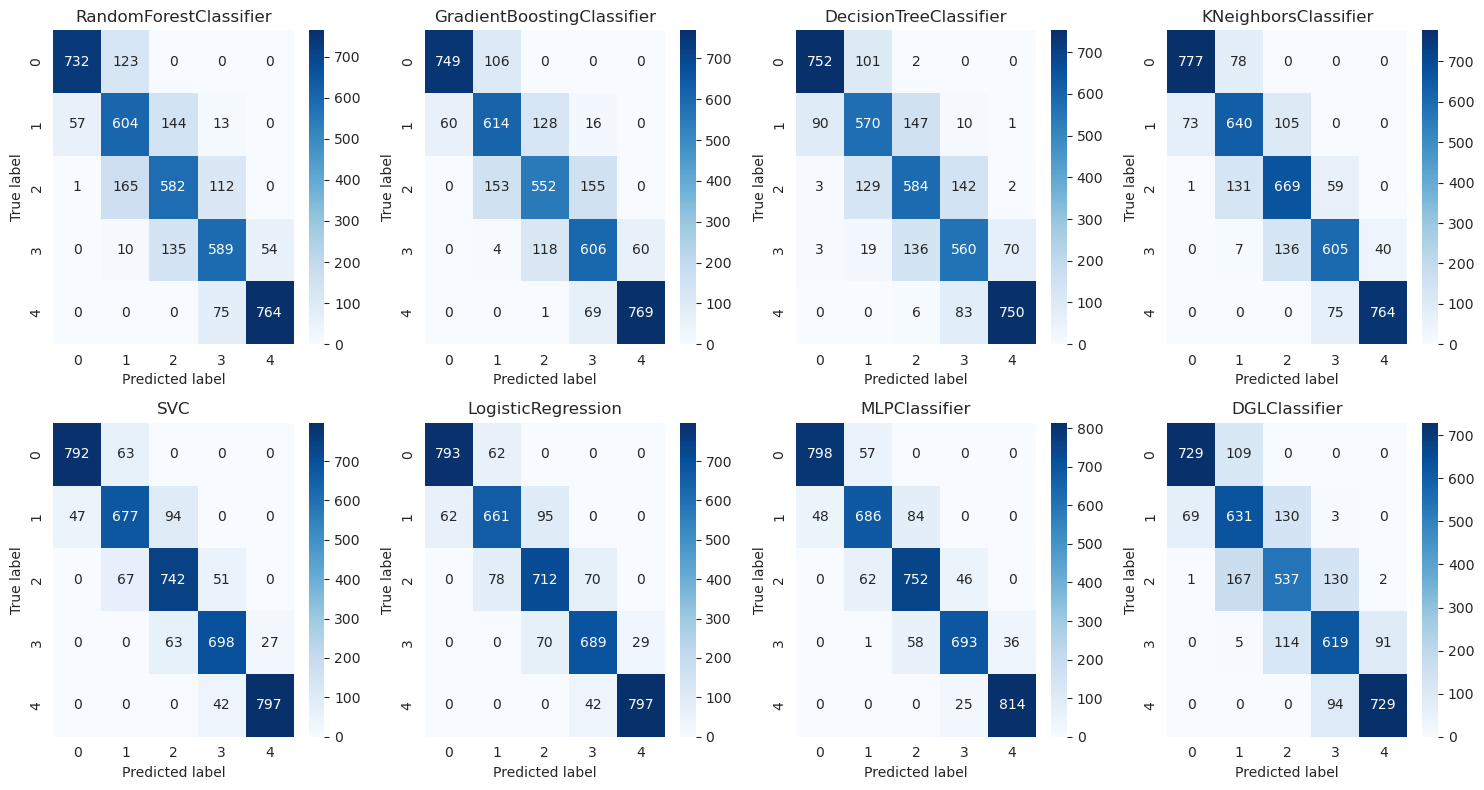

In [138]:
# Plot confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
ax = axes.ravel()
for i in range(len(classifiers)):
    sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues", ax=ax[i])
    ax[i].set_title(type(classifiers[i]).__name__)
    ax[i].set_xlabel("Predicted label")
    ax[i].set_ylabel("True label")
plt.tight_layout()
plt.show()

#save in svg
fig.savefig('confusion_matrices_blues.svg', format='svg', dpi=1200)


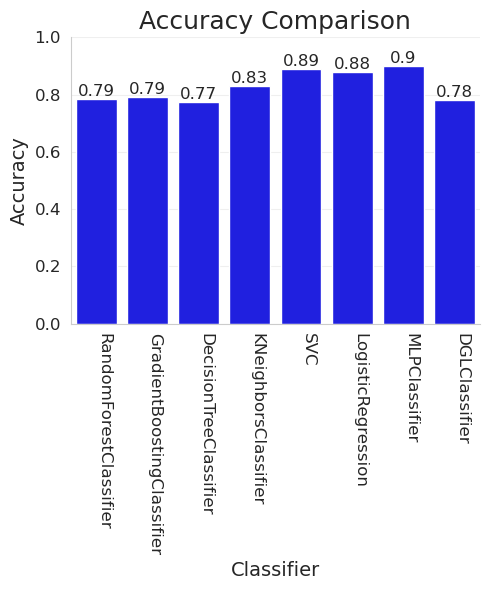

In [142]:
# Set figure size and style
plt.figure(figsize=(5, 6))
sns.set_style('whitegrid')

# Plot accuracies as bar chart
ax = sns.barplot(x=[type(c).__name__ for c in classifiers], y=accuracies, color='blue')

# Add labels and customizations
ax.set_title("Accuracy Comparison", fontsize=18)
ax.set_xlabel("Classifier", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_ylim([0, 1])
ax.yaxis.grid(True, alpha=0.3)
plt.xticks(rotation=-90, ha='left', fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Add text labels for each bar
for i, v in enumerate(accuracies):
    ax.text(i, v+0.01, str(round(v, 2)), ha='center', fontsize=12)



# Show plot
plt.tight_layout()
#save plt in svg
plt.savefig('accuracy_comparison_blues.svg', format='svg', dpi=1200)

plt.show()


#  WITH ENCODED LABELS ONLY

In [151]:
# read info.csv
info = pd.read_csv('./data/info.csv')

# for every element in the column 
for i in range(len(info)):
    # convert the string to a list of ints
    elem = [int(j) for j in info['labels'][i][1:-1].split(',')]
    # replace the string with the list of ints
    info['labels'][i] = elem

assert all([len(info['labels'][i]) == info['room_amount'][i] + info['window_amount'][i] for i in range(len(info))])


# Count occurrences of each label value in each row
labels_counts = info['labels'].apply(lambda x: pd.Series(x).value_counts()).fillna(0)

# Rename columns to include prefix
labels_counts.columns = ['label_count_' + str(c) for c in labels_counts.columns]

# Concatenate counts with original dataframe
info_encoded = pd.concat([info.drop('labels', axis=1), labels_counts], axis=1)



/tmp/ipykernel_497330/4273999264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['labels'][i] = elem


In [152]:
labels = ["window_xxs_n", "window_xxs_ne", "window_xxs_e", "window_xxs_se", "window_xxs_s", "window_xxs_sw", "window_xxs_w", "window_xxs_nw", "window_xs_n", "window_xs_ne", "window_xs_e", "window_xs_se", "window_xs_s", "window_xs_sw", "window_xs_w", "window_xs_nw", "window_s_n", "window_s_ne", "window_s_e", "window_s_se", "window_s_s", "window_s_sw", "window_s_w", "window_s_nw", "window_m_n", "window_m_ne", "window_m_e", "window_m_se", "window_m_s", "window_m_sw", "window_m_w", "window_m_nw", "window_l_n", "window_l_ne", "window_l_e", "window_l_se", "window_l_s", "window_l_sw", "window_l_w", "window_l_nw", "window_xl_n", "window_xl_ne", "window_xl_e", "window_xl_se", "window_xl_s", "window_xl_sw", "window_xl_w", "window_xl_nw", "window_xxl_n", "window_xxl_ne", "window_xxl_e", "window_xxl_se", "window_xxl_s", "window_xxl_sw", "window_xxl_w", "window_xxl_nw", "livingroom_xxs", "livingroom_xs", "livingroom_s", "livingroom_m", "livingroom_l", "livingroom_xl", "livingroom_xxl", "utility_xxs", "utility_xs", "utility_s", "utility_m", "utility_l", "utility_xl", "utility_xxl", "toilet_xxs", "toilet_xs", "toilet_s", "toilet_m", "toilet_l", "toilet_xl", "toilet_xxl", "bedroom_xxs", "bedroom_xs", "bedroom_s", "bedroom_m", "bedroom_l", "bedroom_xl", "bedroom_xxl", "bathroom_xxs", "bathroom_xs", "bathroom_s", "bathroom_m", "bathroom_l", "bathroom_xl", "bathroom_xxl"]


new_names = {
    f'label_count_{i}': label 
    for i, label in enumerate(labels)
}

info_encoded = info_encoded.rename(columns=new_names)


In [153]:
#get the last len(labels)   columns
info_encoded_data = info_encoded.iloc[:, -len(labels):]

In [154]:
# concat with output column total_site_energy_consumption_per_surface_MJm2
info_encoded_data = pd.concat([info_encoded_data, info_encoded['total_site_energy_consumption_per_surface_MJm2']], axis=1) 


In [181]:
info_encoded_data.to_csv('./data/info_encoded.csv', index=False)

In [155]:
# Load the data
data = info_encoded_data
input_cols = labels
output_col = 'total_site_energy_consumption_per_surface_MJm2'

# Replace target label with class
data[output_col] = data[output_col].apply(lambda x: energy_to_class(x, quantiles_dict['energy']))

# Split the data into training and testing sets
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

# Define the list of classifiers to test
classifiers = [
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression(),
    MLPClassifier(),
]

# Loop over classifiers
confusion_matrices = []
accuracies = []
classification_reports = []
for classifier in classifiers:
    # Train the classifier
    scaler = StandardScaler()
    train_set_scaled = scaler.fit_transform(train_set[input_cols])
    test_set_scaled = scaler.transform(test_set[input_cols])
    classifier.fit(train_set_scaled, train_set[output_col])

    # Make predictions
    predictions = classifier.predict(test_set_scaled)

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(test_set[output_col], predictions)
    cm = confusion_matrix(test_set[output_col], predictions)
    cr = classification_report(test_set[output_col], predictions)

    # Add accuracy and confusion matrix to lists
    accuracies.append(accuracy)
    confusion_matrices.append(cm)
    classification_reports.append(cr)

########################
########ADDING DGL###### 
########################
# TODO: proper comparison 

# load dgl_actual.pkl 
with open('./dgl_actual.pkl', 'rb') as f:
    dgl_actual = pickle.load(f)

# load dgl_predicted.pkl
with open('./dgl_predicted.pkl', 'rb') as f:
    dgl_predicted = pickle.load(f)

class DGLClassifier:
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

accuracy = accuracy_score(dgl_actual, dgl_predicted)
cm = confusion_matrix(dgl_actual, dgl_predicted)
cr = classification_report(dgl_actual, dgl_predicted)

classifiers.append(DGLClassifier())
accuracies.append(accuracy)
confusion_matrices.append(cm)
classification_reports.append(cr)


/home/gianmarco/.conda/envs/dtr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gianmarco/.conda/envs/dtr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [156]:
# print the classifier name and the classification report
for classifier, report in zip(classifiers, classification_reports):
    print(classifier)
    print(report)

RandomForestClassifier(max_depth=10, random_state=0)
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       855
           1       0.48      0.45      0.46       818
           2       0.50      0.34      0.41       860
           3       0.47      0.52      0.49       788
           4       0.76      0.81      0.78       839

    accuracy                           0.59      4160
   macro avg       0.58      0.59      0.58      4160
weighted avg       0.58      0.59      0.58      4160

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       855
           1       0.50      0.50      0.50       818
           2       0.50      0.38      0.43       860
           3       0.48      0.50      0.49       788
           4       0.76      0.83      0.79       839

    accuracy                           0.61      4160
   macro avg       0.60      0.61      0.60      

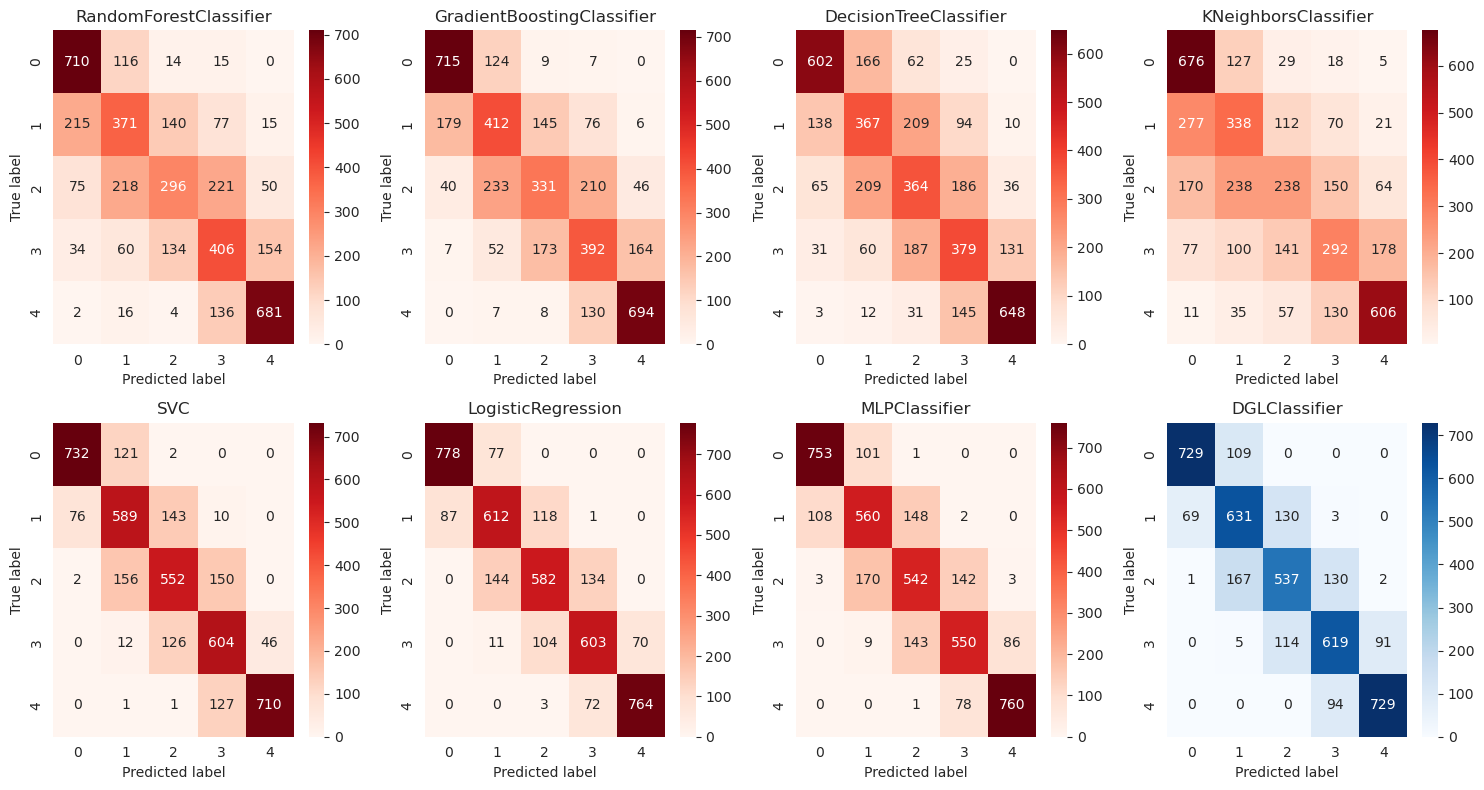

In [163]:
# Plot confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
ax = axes.ravel()
for i in range(len(classifiers)):
    if i == len(classifiers)-1:
        sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues", ax=ax[i])
    else:
        sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Reds", ax=ax[i])
    ax[i].set_title(type(classifiers[i]).__name__)
    ax[i].set_xlabel("Predicted label")
    ax[i].set_ylabel("True label")
plt.tight_layout()
plt.show()

#save in svg
fig.savefig('confusion_matrices_reds.svg', format='svg', dpi=1200)

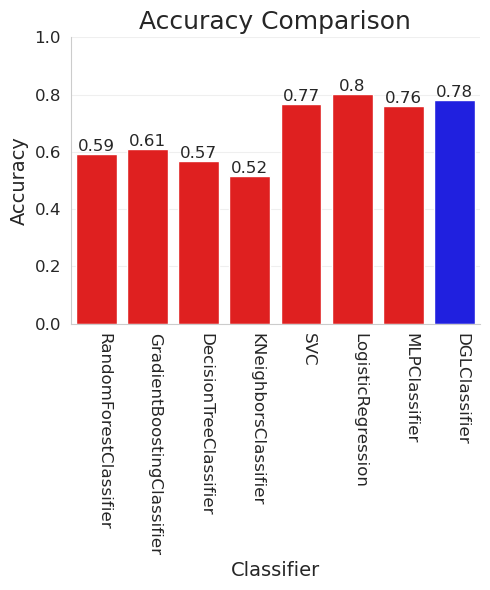

In [164]:
# Set figure size and style
plt.figure(figsize=(5, 6))
sns.set_style('whitegrid')

# Plot accuracies as bar chart
colors = ['red'] * len(classifiers)
colors[-1] = 'blue'
ax = sns.barplot(x=[type(c).__name__ for c in classifiers], y=accuracies, palette=colors)

# Add labels and customizations
ax.set_title("Accuracy Comparison", fontsize=18)
ax.set_xlabel("Classifier", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_ylim([0, 1])
ax.yaxis.grid(True, alpha=0.3)
plt.xticks(rotation=-90, ha='left', fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text labels for each bar
for i, v in enumerate(accuracies):
    ax.text(i, v+0.01, str(round(v, 2)), ha='center', fontsize=12)

plt.tight_layout()

#save plt in svg
plt.savefig('accuracy_comparison_reds.svg', format='svg', dpi=1200)

# Show plot
plt.show()


# Merging 

In [190]:
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'

#read data.csv, info_encoded.csv and merge them, remove duplicate target column 
data = pd.read_csv('./data/data.csv')
data_inputs = data[input_cols]
data_outputs = data[output_col]
info_encoded = pd.read_csv('./data/info_encoded.csv')
info_encoded_inputs = info_encoded[labels]
merged_data = pd.concat([data_inputs, info_encoded_inputs, data_outputs], axis=1)


In [191]:
merged_data.to_csv('./data/merged_data.csv', index=False)

In [193]:
# Load the data
data = merged_data
input_cols = input_cols + labels
output_col = 'total_site_energy_consumption_per_surface_MJm2'

# Replace target label with class
data[output_col] = data[output_col].apply(lambda x: energy_to_class(x, quantiles_dict['energy']))

# Split the data into training and testing sets
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

# Define the list of classifiers to test
classifiers = [
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression(),
    MLPClassifier(),
]

# Loop over classifiers
confusion_matrices = []
accuracies = []
classification_reports = []
for classifier in classifiers:
    # Train the classifier
    
    classifier.fit(train_set_scaled, train_set[output_col])

    # Make predictions
    predictions = classifier.predict(test_set_scaled)

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(test_set[output_col], predictions)
    cm = confusion_matrix(test_set[output_col], predictions)
    cr = classification_report(test_set[output_col], predictions)

    # Add accuracy and confusion matrix to lists
    accuracies.append(accuracy)
    confusion_matrices.append(cm)
    classification_reports.append(cr)

########################
########ADDING DGL###### 
########################
# TODO: proper comparison 

# load dgl_actual.pkl 
with open('./dgl_actual.pkl', 'rb') as f:
    dgl_actual = pickle.load(f)

# load dgl_predicted.pkl
with open('./dgl_predicted.pkl', 'rb') as f:
    dgl_predicted = pickle.load(f)

class DGLClassifier:
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

accuracy = accuracy_score(dgl_actual, dgl_predicted)
cm = confusion_matrix(dgl_actual, dgl_predicted)
cr = classification_report(dgl_actual, dgl_predicted)

classifiers.append(DGLClassifier())
accuracies.append(accuracy)
confusion_matrices.append(cm)
classification_reports.append(cr)


/home/gianmarco/.conda/envs/dtr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gianmarco/.conda/envs/dtr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


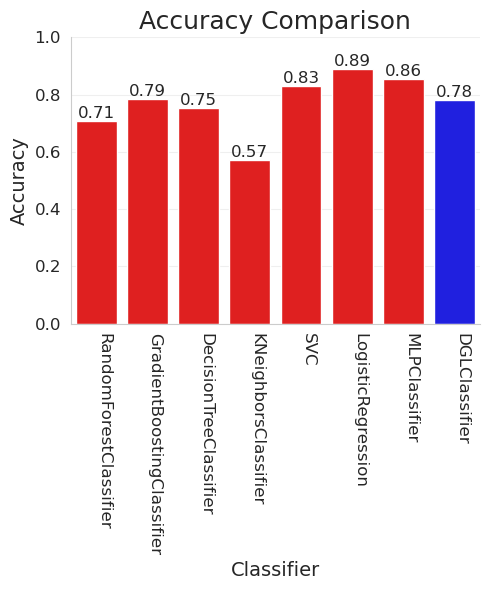

In [194]:
# Set figure size and style
plt.figure(figsize=(5, 6))
sns.set_style('whitegrid')

# Plot accuracies as bar chart
colors = ['red'] * len(classifiers)
colors[-1] = 'blue'
ax = sns.barplot(x=[type(c).__name__ for c in classifiers], y=accuracies, palette=colors)

# Add labels and customizations
ax.set_title("Accuracy Comparison", fontsize=18)
ax.set_xlabel("Classifier", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_ylim([0, 1])
ax.yaxis.grid(True, alpha=0.3)
plt.xticks(rotation=-90, ha='left', fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text labels for each bar
for i, v in enumerate(accuracies):
    ax.text(i, v+0.01, str(round(v, 2)), ha='center', fontsize=12)

plt.tight_layout()

#save plt in svg
plt.savefig('accuracy_comparison_reds.svg', format='svg', dpi=1200)

# Show plot
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (99,) and arg 1 with shape (98,).

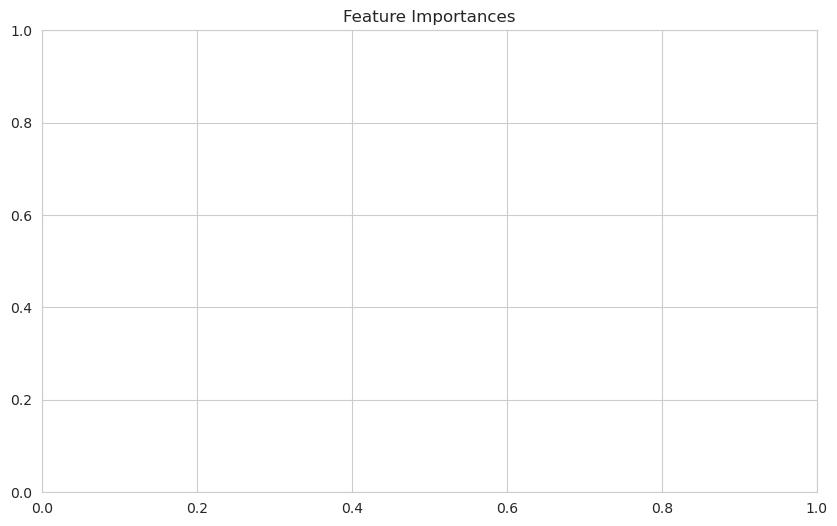

In [201]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(merged_data[input_cols], data[output_col])

# Get feature importances and indices
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(merged_data[input_cols].shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(merged_data[input_cols].shape[1]), merged_data.columns[indices], rotation=-90, ha='left', fontsize=6)
plt.xlim([-1, merged_data[input_cols].shape[1]])
plt.tight_layout()
plt.show()
